Rent Interest Classifier 
===
---

 - This classification model predicts the degree of popularity for a rental listing judged by its profiles such as the number of rooms, location, price, etc.  
 - It predicts whether a given listing would receive "low," "medium," or
   "high" interest with its corresponding probability to a particular listing.

---
**Multiclass Classifier with Probability Estimates**
---
The problem of classification is considered as learning a model that maps instances to class labels. While useful for many purposes, there are numerous applications in which the estimation of the probabilities of the different classes is more desirable than just selecting one of them, in that probabilities are useful as a measure of the reliability of a classification.

**Datasets**
---
NYC rent listing data from the rental website RentHop which is used to find the desired home.
Datasets include 

 1. ***train*** and ***test*** databases, both provided in a JavaScript Object Notation format,
 2. ***sample submission*** listing_id with interest level probabilities for each class i.e., high, medium, and low, 
 3. ***image sample*** of selective 100 listings, and
 4. ***kaggle-renthop*** zipfile that contains all listing images where the file size is 78.5GB. 

The JSON dataset is a structured database that contains the listing information as the number of bathrooms and bedrooms, building_id, created, description, display_address, features, latitude, listing_id, longitude, manager_id, photos links, price, street_address,  and interest_level.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "/Users/soyoungkim/Desktop/python_codes/two-sigma"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)

import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools

from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode(connected=True)

train = pd.read_json("/Users/soyoungkim/Desktop/python_codes/two-sigma/data/train.json")
test = pd.read_json("/Users/soyoungkim/Desktop/python_codes/two-sigma/data/test.json")

README.md
__init__.py
data
src
two_sigma.ipynb
~$o Sigma's competition.docx



In [2]:
print ('There are {0} rows and {1} attributes.'.format(train.shape[0], train.shape[1]))
train.head()

There are 49352 rows and 15 attributes.


,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


In [3]:
print ('There are {0} rows and {1} attributes.'.format(test.shape[0], test.shape[1]))
test.tail()

There are 74659 rows and 14 attributes.


,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address
99995,1.0,2,0,2016-04-16 01:27:59,Beautiful two bedrooms with elevator and Laund...,66th Avenue,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7267,6881005,-73.8569,e8be88fd4ed2b9a12dca618d5e850ae9,[],2000,96-09 66th Avenue
99996,1.0,1,eb4a89fa59ccddd7ff88fa63d2848291,2016-04-06 18:26:30,,Broad St,[],40.7061,6835379,-74.0111,8f5a9c893f6d602f4953fcc0b8e6e9b4,[],3649,25 Broad St
99997,1.0,0,dec7c3a848a6149cb78cc36357b27886,2016-04-16 03:03:02,This studio unit features hardwood flooring th...,West 55th Street,"[Doorman, Elevator, Pre-War, Laundry in Buildi...",40.7661,6882352,-73.9859,13ddb55a3a9d896b4bcdd538ee0ec067,[https://photos.renthop.com/2/6882352_07fba7ea...,2195,350 West 55th Street
99998,1.0,1,67ab535b820c8292ac59cfcffd8974e3,2016-04-16 15:32:44,(I am avail via text 24/7 @ 151-024-5907 for a...,East 89th Street #2D,"[Cats Allowed, Dogs Allowed, Reduced Fee]",40.7792,6884758,-73.9484,614d589dc9b706652ebc2f86d31e19ba,[https://photos.renthop.com/2/6884758_f6ebb90d...,1775,333 East 89th Street #2D
99999,1.0,2,be97e14c554ba6a01d26243ca5eefb82,2016-04-26 02:18:19,Beautiful HUGE 2 bedroom apartment located in ...,Metropolitan Avenue,"[Elevator, Dogs Allowed, Cats Allowed]",40.7145,6924212,-73.9383,62c2e57109eb335cad8b03f84975e3d1,[https://photos.renthop.com/2/6924212_3a4e1711...,2850,924 Metropolitan Avenue


**Pre-processing and feature extraction**
---
**Feature Selection in Python with Scikit-Learn**

Feature selection is a process where you automatically select affective features in your data that contribute most to the prediction variable or target output. In order to maximize the performance of machine learning techniques,  important attributes are selected before creating a machine learning model using the Scikit-learn library having the feature_importances_ member variable of the trained model. 

Given an importance score for each attribute where the larger score the more important the attribute. The scores show price, the number of features/photos/words, and date as the importance attributes.

In [4]:
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 10 to 99994
Data columns (total 15 columns):
bathrooms          49352 non-null float64
bedrooms           49352 non-null int64
building_id        49352 non-null object
created            49352 non-null object
description        49352 non-null object
display_address    49352 non-null object
features           49352 non-null object
interest_level     49352 non-null object
latitude           49352 non-null float64
listing_id         49352 non-null int64
longitude          49352 non-null float64
manager_id         49352 non-null object
photos             49352 non-null object
price              49352 non-null int64
street_address     49352 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


----------
**Interest Level Distribution**
----------
Distribution of interest level: 
 - **Low (69.5%)**
 - Medium (22.8%)
 - High (7.8%)

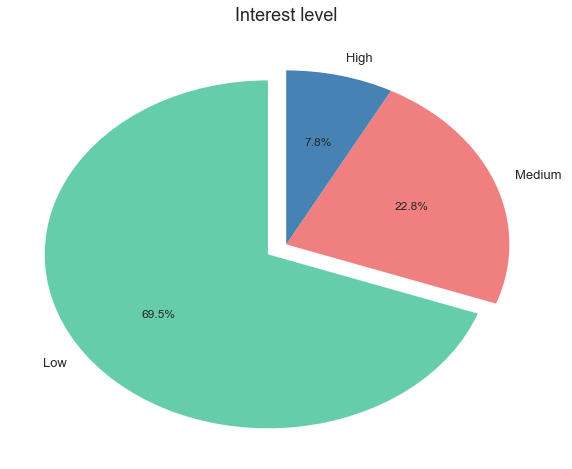

In [5]:
plt.subplots(figsize=(10, 8))
sizes = train['interest_level'].value_counts().values
patches, texts, autotexts= plt.pie(sizes, labels=['Low', 'Medium', 'High'],
                                  colors=['mediumaquamarine','lightcoral', 'steelblue'],
                                  explode=[0.1, 0, 0], autopct="%1.1f%%", 
                                  startangle=90)

texts[0].set_fontsize(13)
texts[1].set_fontsize(13)
texts[2].set_fontsize(13)
plt.title('Interest level', fontsize=18)
plt.show()

----------
**Feature Importance**
----------
Ensemble methods are a promising solution to highly imbalanced nonlinear classification tasks with mixed variable types and noisy patterns with high variance. Methods compute the relative importance of each attribute. These importance values can be used to inform a feature selection process. This shows the construction of an Extra Trees ensemble of the dataset and the display of the relative feature importance.

As can be seen in the *train.info()* table, data types are mixed.

 1. **Categorical**: description, display_address, features, manager_id, building_id, street_address
 2. **Numeric**: bathrooms, bedrooms, latitude, longitude, price
 3. Other: created, photos 

In order to generate the feature importance matrix, non-numeric data types attributes should be converted to numerical values. Following assumptions are considered.

 - **description**: The more words and well-described listings might be spotted. 
 - **features**: Some features are more preferred over others.
 - **photos**: The more images might get more views with having interest.

In [6]:
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
from textblob import TextBlob

def room_price(x, y):
    if y == 0:
        return 0
    return x/y

train['nb_images'] = train['photos'].apply(len)
train['nb_features'] = train['features'].apply(len)
train['nb_description'] = train['description'].apply(lambda x: len(x.split(' ')))
train['description_len'] = train['description'].apply(len)
train = train.join(
                   train['description'].apply(
                       lambda x: TextBlob(x).sentiment.polarity).rename('sentiment'))
train['price_room'] = train.apply(lambda row: room_price(row['price'], 
                                                         row['bedrooms']), axis=1)

----------
**Attribute:  Building ID**
----------

0                                   8286
96274288c84ddd7d5c5d8e425ee75027     275
11e1dec9d14b1a9e528386a2504b3afc     215
80a120d6bc3aba97f40fee8c2204524b     213
bb8658a3e432fb62a440615333376345     212
f68bf347f99df026f4faad43cc604048     191
c94301249b8c09429d329864d58e5b82     167
ce6d18bf3238e668b2bf23f4110b7b67     165
57ef86c28a8ae482dc3a3c3af28e8e48     159
128d4af0683efc5e1eded8dc8044d5e3     153
Name: building_id, dtype: int64
7585


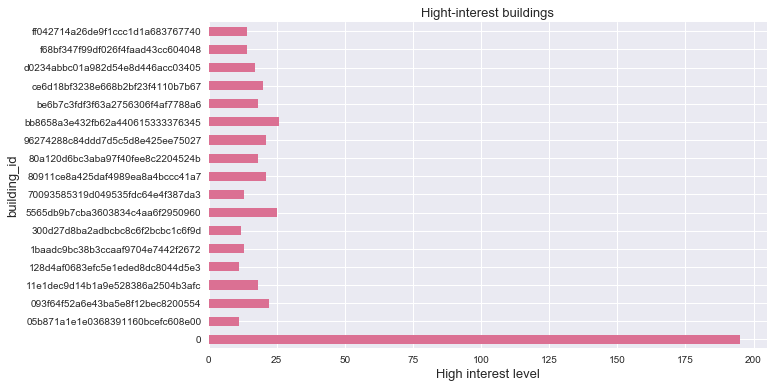

In [7]:
# Number of listings based on building ID
top_buildings = train['building_id'].value_counts().nlargest(10)
print (top_buildings)
print (len(train['building_id'].unique()))

grouped_building = train.groupby(
    ['building_id', 'interest_level'])['building_id'].count().unstack('interest_level').fillna(0)

grouped_building['sum'] = grouped_building.sum(axis=1)
x = grouped_building[(grouped_building['sum'] > 50) & (grouped_building['high'] > 10)]

# x = x[x.index != '0'] # Ignore N/A value

fig = plt.figure(figsize=(10, 6))

plt.title('Hight-interest buildings', fontsize=13)
plt.xlabel('High interest level', fontsize=13)
plt.ylabel('Building ID', fontsize=13)
x['high'].plot.barh(color="palevioletred");

build_counts = pd.DataFrame(train.building_id.value_counts())
build_counts['b_counts'] = build_counts['building_id']
build_counts['building_id'] = build_counts.index
build_counts['b_count_log'] = np.log2(build_counts['b_counts'])
train = pd.merge(train, build_counts, on="building_id")

----------
**Attribute:  Manager ID**
----------

e6472c7237327dd3903b3d6f6a94515a    2533
6e5c10246156ae5bdcd9b487ca99d96a     711
8f5a9c893f6d602f4953fcc0b8e6e9b4     410
62b685cc0d876c3a1a51d63a0d6a8082     402
cb87dadbca78fad02b388dc9e8f25a5b     373
9df32cb8dda19d3222d66e69e258616b     330
b7de4cb395920136663132057fa89d84     320
2aa9bfa5f67ed9997ea341dee8a3a271     316
ad3d8ddc52c7e0859b5c6c7f7949c3bd     305
c9c33695ee2a2f818e9f1d8f7d1c4b39     299
Name: manager_id, dtype: int64
3481
interest_level                    high   low  medium   sum
manager_id                                                
0000abd7518b94c35a90d64b56fbf3e6   0.0   4.0     8.0  12.0
001ce808ce1720e24a9510e014c69707   0.0  10.0     0.0  10.0
003fc4e9a70053082f131b1054966aaf   0.0   1.0     0.0   1.0
00607a02f6efd9c6c7c588826e471ee9   0.0   0.0     2.0   2.0
00995ff28d79127ed2dca8320e9e7d09   0.0   2.0     1.0   3.0


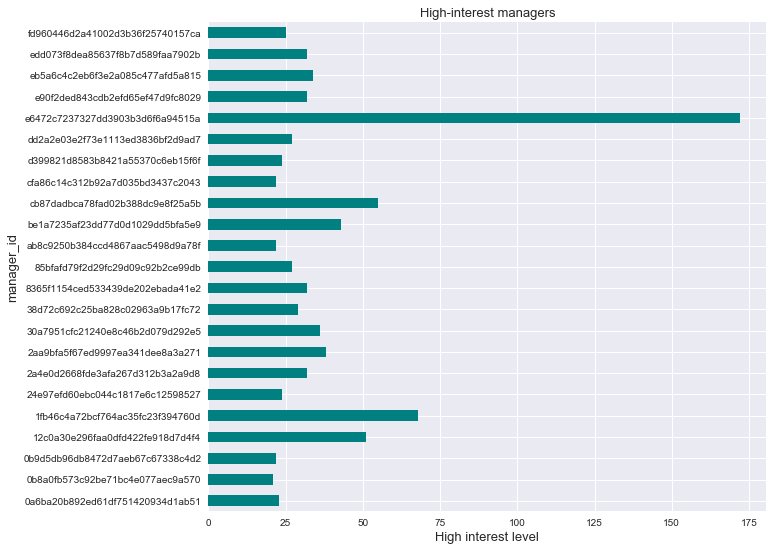

In [8]:
# High-interest managers
top_managers = train['manager_id'].value_counts().nlargest(10)
print (top_managers)
print (len(train['manager_id'].unique()))

grouped_manager = train.groupby(
    ['manager_id', 'interest_level'])['manager_id'].count().unstack('interest_level').fillna(0)

grouped_manager['sum'] = grouped_manager.sum(axis=1)
print (grouped_manager.head())

x = grouped_manager.loc[(grouped_manager['high'] > 20 ) & (grouped_manager['sum'] > 50)]

plt.title('High-interest managers', fontsize=13)
plt.xlabel('High interest level', fontsize=13)
plt.ylabel('Manager ID', fontsize=13)
x['high'].plot.barh(figsize=(10, 9), color="teal");

man_counts = pd.DataFrame(train.manager_id.value_counts())
man_counts['m_counts'] = man_counts['manager_id']
man_counts['manager_id'] = man_counts.index
man_counts['m_count_log'] = np.log10(man_counts['m_counts'])
train = pd.merge(train, man_counts, on="manager_id")

----------
Feature Importance Ranking
---------

[ 0.01829425  0.03133136  0.10494012  0.08983275  0.0711159   0.06978512
  0.06516331  0.06895097  0.07275584  0.07590001  0.07201913  0.06310899
  0.06372654  0.0688881   0.06418762]


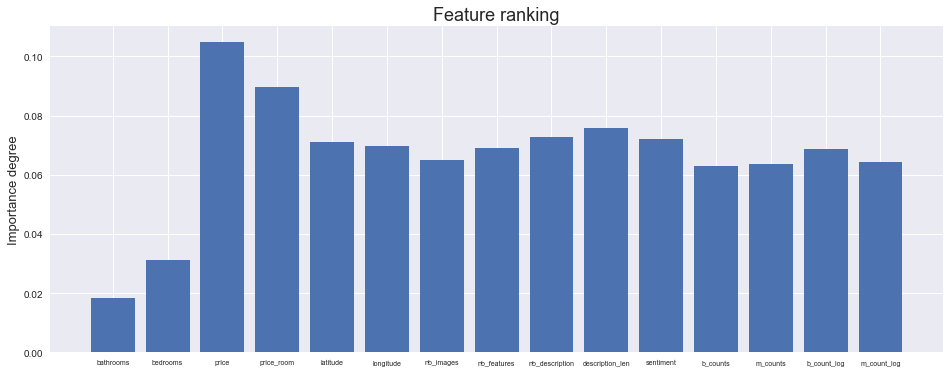

In [9]:
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

numerical_features = train[['bathrooms', 'bedrooms', 'price', 'price_room',
                            'latitude','longitude', 'nb_images','nb_features', 
                            'nb_description', 'description_len','sentiment',
                            'b_counts', 'm_counts',
                            'b_count_log', 'm_count_log']]

# Fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(numerical_features, train['interest_level'])

# Display the relative importance of each attribute
print (model.feature_importances_)

# Plot feature importance
plt.subplots(figsize=(16, 6))
plt.title('Feature ranking', fontsize = 18)
plt.ylabel('Importance degree', fontsize = 13)
# plt.xlabel("Features", fontsize = 14)

feature_names = numerical_features.columns
plt.xticks(range(numerical_features.shape[1]), feature_names, fontsize = 7)
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

In [10]:
# Use feature importance for feature selection
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

# Converting categorical values for Interest Level to numeric values
# Low: 1, Medium: 2, High: 3
train['interest'] = np.where(train['interest_level']=='low', 1,
                             np.where(train['interest_level']=='medium', 2, 3))

X = numerical_features
Y = train['interest']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, 
                                                    random_state=7)

# Fit model on all training data
model = XGBClassifier()
model.fit(X_train, y_train)

# Make predictions for test data and evaluate
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
	# Select features using threshold
	selection = SelectFromModel(model, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train)
    
	# Train model
	selection_model = XGBClassifier()
	selection_model.fit(select_X_train, y_train)
    
	# Evalation model
	select_X_test = selection.transform(X_test)
	y_pred = selection_model.predict(select_X_test)
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(y_test, predictions)
	print ("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], 
                                                    accuracy*100.0))

Accuracy: 72.61%
Thresh=0.000, n=15, Accuracy: 72.61%
Thresh=0.000, n=15, Accuracy: 72.61%
Thresh=0.019, n=13, Accuracy: 72.61%
Thresh=0.023, n=12, Accuracy: 72.45%
Thresh=0.029, n=11, Accuracy: 72.64%
Thresh=0.032, n=10, Accuracy: 72.55%
Thresh=0.054, n=9, Accuracy: 72.52%
Thresh=0.063, n=8, Accuracy: 72.54%
Thresh=0.069, n=7, Accuracy: 72.57%
Thresh=0.081, n=6, Accuracy: 72.34%
Thresh=0.082, n=5, Accuracy: 72.09%
Thresh=0.085, n=4, Accuracy: 71.63%
Thresh=0.091, n=3, Accuracy: 70.59%
Thresh=0.142, n=2, Accuracy: 70.61%
Thresh=0.230, n=1, Accuracy: 70.22%


----------
Correlation Graph
---------

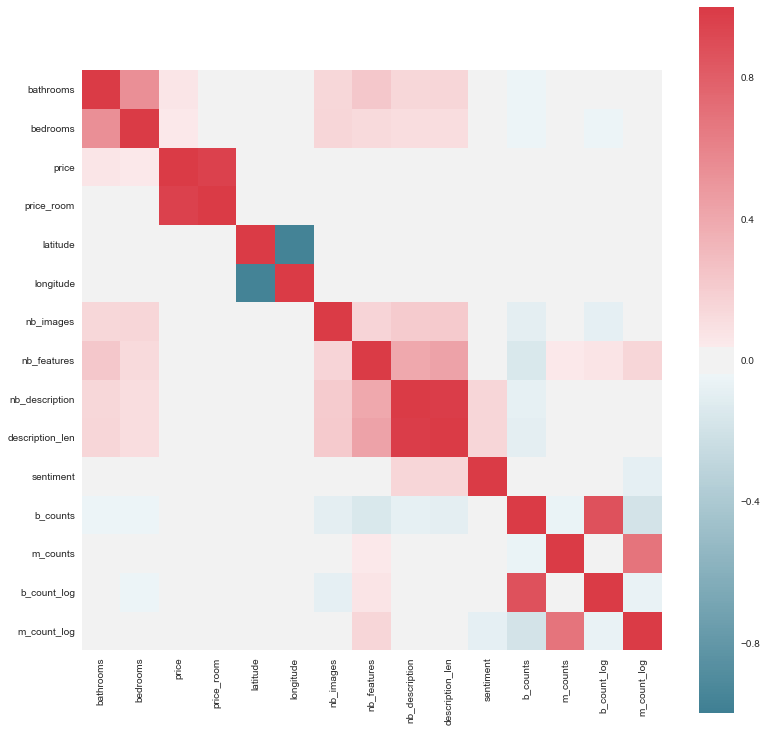

In [11]:
f, ax = plt.subplots(figsize=(13, 13))
corr = numerical_features.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

----------
Correlation Matrix
---------

In [12]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "10pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "11pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '11pt')])]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '8pt'})\
    .set_caption('Correlation Matrix')\
    .set_precision(2)\
    .set_table_styles(magnify())

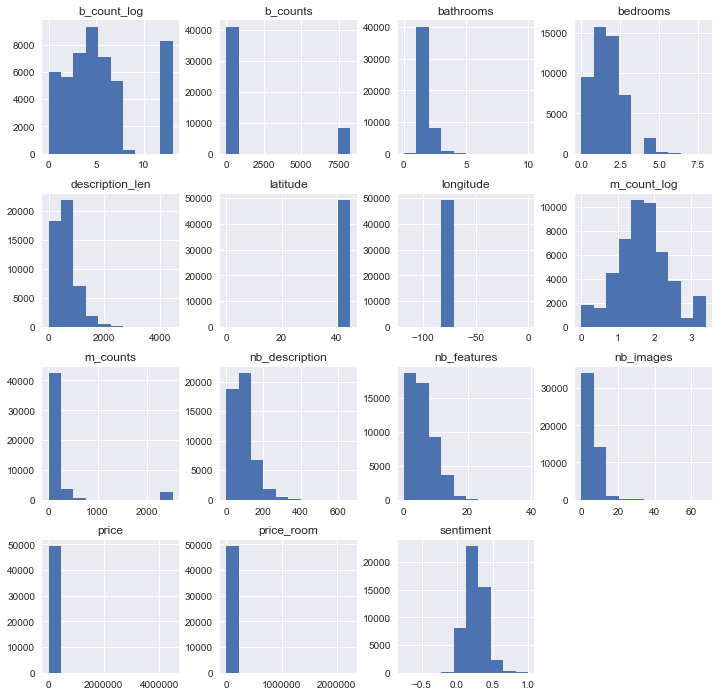

In [13]:
numerical_features[['bathrooms', 'bedrooms', 'price', 'price_room',
                    'latitude','longitude', 'nb_images','nb_features', 
                    'nb_description', 'description_len','sentiment',
                    'b_counts', 'm_counts',
                    'b_count_log', 'm_count_log']].hist(figsize=(12, 12))
plt.show()

----------
**Attribute:  Bathrooms, Bedrooms**
----------

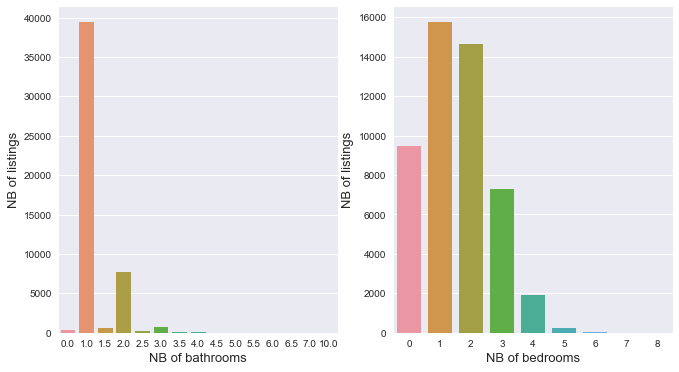

In [14]:
'''
subplot grid parameters encoded as a single integer.
ijk means i x j grid, k-th subplot
subplot(221) #top left
subplot(222) #top right
subplot(223) #bottom left
subplot(224) #bottom right 
'''
fig = plt.figure(figsize=(11, 6))

# Number of listings
sns.countplot(train['bathrooms'], ax = plt.subplot(121));
plt.xlabel('NB of bathrooms', fontsize=13);
plt.ylabel('NB of listings', fontsize=13);

sns.countplot(train['bedrooms'], ax = plt.subplot(122));
plt.xlabel('NB of bedrooms', fontsize=13);
plt.ylabel('NB of listings', fontsize=13);

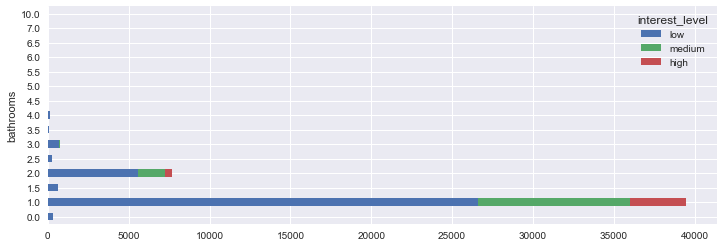

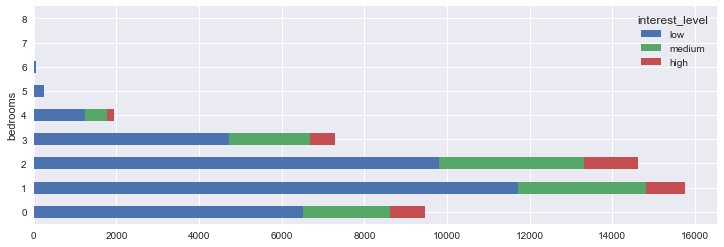

In [15]:
# Number of rooms based on Interest level
grouped_bathroom = train.groupby(
    ['bathrooms', 'interest_level'])['bathrooms'].count().unstack('interest_level').fillna(0)
grouped_bathroom[['low', 'medium', 'high']].plot.barh(stacked=True, figsize=(12, 4));

grouped_bedroom = train.groupby(
    ['bedrooms', 'interest_level'])['bedrooms'].count().unstack('interest_level').fillna(0)
grouped_bedroom[['low', 'medium', 'high']].plot.barh(stacked=True, figsize=(12.25, 4));

----------
**Attribute:  Latitude, Longitude - geographical information**
----------

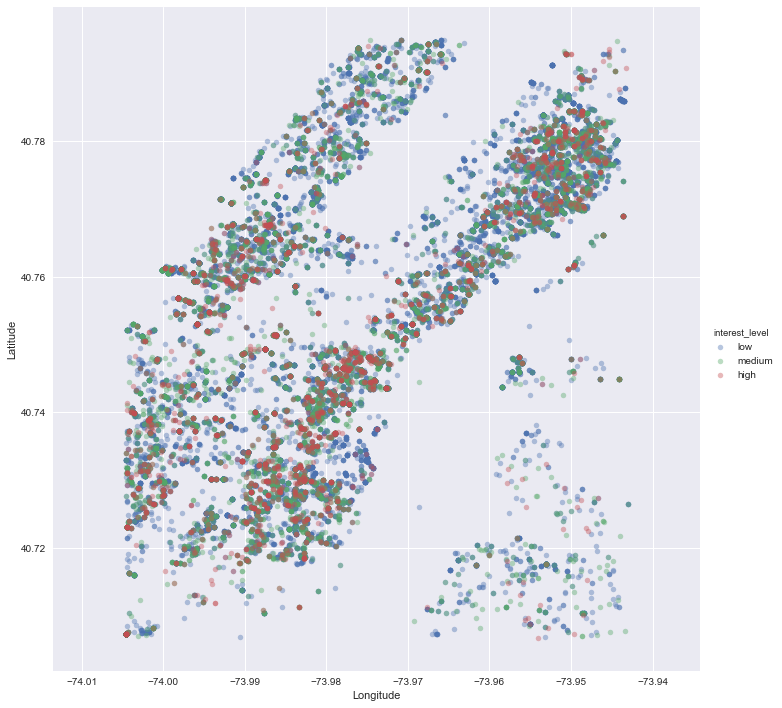

In [16]:
# Rent interest graph of New-York
sns.lmplot(x='longitude', y='latitude', fit_reg=False, hue='interest_level',
           hue_order=['low', 'medium', 'high'], size=10, scatter_kws={'alpha':0.4,'s':30},
           data=train[(train['longitude']>train['longitude'].quantile(0.1))
                      &(train['longitude']<train['longitude'].quantile(0.9))
                      &(train['latitude']>train['latitude'].quantile(0.1))                           
                      &(train['latitude']<train['latitude'].quantile(0.9))]);
plt.xlabel('Longitude');
plt.ylabel('Latitude');

**Methods**
---
**Building the classification Model**

Two main techniques are considered to build the classification model: Decision Tree and Ensemble Method. Let us start with the definitions. 

 - A decision tree is a tree structure, where the classification process starts from a root node and is split on every subsequent step based on the features and their values. The exact structure of a given decision tree is determined by a tree induction algorithm; there are a number of different induction algorithms which are based on different splitting criteria such as information gain.
 - Ensemble learning method constructs a collection of individual classifiers that are diverse yet accurate. 
    1. Bagging
   - One of the most popular techniques for constructing ensembles is boostrap aggregation called
   ‘bagging’. In bagging, each training set is constructed by forming a bootstrap replicate of the original training set. So this bagging algorithm is promising ensemble learner that improves the results of any decision tree based learning algorithm.
    2. Boosting
   - Gradient boosting is also powerful techniques for building predictive models. While bagging considers candidate models equally, boosting technique is based on whether a weak learner can be modified to become better. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance. XGBoost stands for eXtreme Gradient Boosting.

I generated a set of new features derived from the datasets as a preprocessing. A table with a new set of 15 features is generated instead of original mixed data types instances and it is mapped into inputs in XGBoost classification model. Other classification models - Support Vector Machine, Rnadom Forest, and Gradient Random Boosting were used to compare its performances.

In [17]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from textblob import TextBlob
from sklearn.metrics import accuracy_score
import time

def pre_processing(data):
    global important_features
    important_features = ['bathrooms', 'bedrooms', 'price', 'price_room',
                          'latitude','longitude', 'nb_images','nb_features',
                          'sentiment', 'nb_description', 'description_len',
                          'b_counts', 'm_counts','b_count_log', 'm_count_log']
    
    data['nb_images'] = data['photos'].apply(len)
    data['nb_features'] = data['features'].apply(len)
    data['nb_description'] = data['description'].apply(lambda x: len(x.split(' ')))
    data['description_len'] = data['description'].apply(len)
    
    def room_price(x, y):
        if y == 0:
            return 0
        return x/y
    
    def sentiment_analysis(x):
        if len(x) == 0:
            return 0
        return TextBlob(x[0]).sentiment.polarity
    
    data = data.join(data['description'].apply(
                         lambda x: TextBlob(x).sentiment.polarity).rename('sentiment'))
    data['price_room'] = data.apply(lambda row: 
                                    room_price(row['price'],row['bedrooms']), axis=1)
    
    build_counts = pd.DataFrame(data.building_id.value_counts())
    build_counts['b_counts'] = build_counts['building_id']
    build_counts['building_id'] = build_counts.index
    build_counts['b_count_log'] = np.log2(build_counts['b_counts'])
    data = pd.merge(data, build_counts, on='building_id')
    
    man_counts = pd.DataFrame(data.manager_id.value_counts())
    man_counts['m_counts'] = man_counts['manager_id']
    man_counts['manager_id'] = man_counts.index
    man_counts['m_count_log'] = np.log10(man_counts['m_counts'])
    data = pd.merge(data, man_counts, on='manager_id')
    
    return data[important_features]

def print_scores(test_name, train, test):
    print ('{0} train score: {1}\n{0} test score: {2}\n'.format(test_name,
                                                               train,
                                                               test))

def classification(train_data, test_data, target, test_size=0.2, random_state=42):    
    # Split data into X and y
    X = numerical_features
    Y = train['interest_level']

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size,
                                                        random_state=random_state)
    
    # XGBoost 
    xgb_model = XGBClassifier()
    xgb_model.fit(X_train, y_train)
    print_scores("XGBoost Classifier",
                 xgb_model.score(X_train, y_train),
                 accuracy_score(y_test, xgb_model.predict(X_test)))

    # Support vector machine
    svm_model = svm.SVC(decision_function_shape='ovo', tol=0.00000001)
    svm_model = svm_model.fit(X_train, y_train)
    print_scores("Support Vector Machine",
                 svm_model.score(X_train, y_train),
                 accuracy_score(y_test, svm_model.predict(X_test)))

    # Random Forest
    random_forest = RandomForestClassifier(n_estimators=10)
    random_forest = random_forest.fit(X_train, y_train)
    print_scores("Random Forest",
                 random_forest.score(X_train, y_train),
                 accuracy_score(y_test, random_forest.predict(X_test)))

    # GradientBoostingClassifier
    gradientB_model = GradientBoostingClassifier(n_estimators=20,
                                      learning_rate=1.0,
                                      max_depth=1,
                                      random_state=0).fit(X_train, y_train)
    gradientB_model = gradientB_model.fit(X_train, y_train)
    print_scores("Gradient Boosting Classifier",
                 gradientB_model.score(X_train, y_train),
                 accuracy_score(y_test, gradientB_model.predict(X_test)))

start_time = time.time()
processed_test_data = pre_processing(test)
print ('A set of 15 derived features:{0}\n'.format(important_features))
classification(numerical_features, processed_test_data, train['interest_level'])
print ('--- %s seconds ---' % (time.time() - start_time))

A set of 15 derived features:['bathrooms', 'bedrooms', 'price', 'price_room', 'latitude', 'longitude', 'nb_images', 'nb_features', 'sentiment', 'nb_description', 'description_len', 'b_counts', 'm_counts', 'b_count_log', 'm_count_log']

XGBoost Classifier train score: 0.727565157924
XGBoost Classifier test score: 0.708742781886

Support Vector Machine train score: 0.976672323396
Support Vector Machine test score: 0.694053287408

Random Forest train score: 0.96567969403
Random Forest test score: 0.706311417283

Gradient Boosting Classifier train score: 0.717155087257
Gradient Boosting Classifier test score: 0.700638233208

--- 1069.70873809 seconds ---


In [18]:
from scipy import sparse
import xgboost as xgb
import random, time
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import loading_data, preprocessing

def gradient_boost(x_train, y_train, x_test):
    gradient_boost_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=6)
    gradient_boost_model.fit(x_train, y_train)
    print (gradient_boost_model.predict_proba(x_test))
    return gradient_boost_model.predict_proba(x_test)
    
def rent_interest_classifier():
    y_train = train['interest_level']
    x_train = numerical_features
    x_test = processed_test_data
    y_train_copy=y_train.copy()
    diction = {'high':1,'medium':2,'low':3}
    y_train1 = map(lambda x: diction[x], y_train)
    y_train = pd.Series(y_train1, index=y_train.index)
    gradient_boost(x_train, y_train, x_test)

if __name__ == '__main__':
    ans = rent_interest_classifier()
    ans_dataframe = pd.DataFrame(ans,columns=['low','medium','high'], index=processed_test_data.index)
    ans_dataframe.to_csv('result.csv', index=False) 

README.md
__init__.py
data
src
two_sigma.ipynb
~$o Sigma's competition.docx

There are 49352 rows and 15 attributes.
49352
There are 74659 rows and 14 attributes.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 7211212 to 6858245
Data columns (total 14 columns):
bathrooms          49352 non-null float64
bedrooms           49352 non-null int64
building_id        49352 non-null object
created            49352 non-null object
description        49352 non-null object
display_address    49352 non-null object
features           49352 non-null object
interest_level     49352 non-null object
latitude           49352 non-null float64
longitude          49352 non-null float64
manager_id         49352 non-null object
photos             49352 non-null object
price              49352 non-null int64
street_address     49352 non-null object
dtypes: float64(3), int64(2), object(9)
memory usage: 5.6+ MB
[[ 0.09565034  0.37680236  0.5275473 ]
 [ 0.09565034  0.37680236  0.5275473 ]
 [ 0.

Conclusion
---

The final model, then, was an Gradient Boost with important features which are:

basic features such as number of rooms, price, and geographic information latitude and longitude,
statistically modified features such as price-per-room, the number of high-interest mangers and building profilers, the number of photos/features and words in descriptions.

It is extremely important to fully understand and define the value that is being modeled, as well as keep an objective view in regards to the analysis. Further research needed regarding probability estimates with loss.

**Relevant papers**

- [Probability Estimates for Multi-class Classification by Pairwise Coupling](https://www.csie.ntu.edu.tw/~cjlin/papers/svmprob/svmprob.pdf)

- [Multi-class AdaBoost](http://ww.web.stanford.edu/~hastie/Papers/SII-2-3-A8-Zhu.pdf)

- [Probability Estimation for Multi-Class
Classification based on Label Ranking](http://www.cs.bris.ac.uk/~flach/ECMLPKDD2012papers/1125762.pdf)

- [Predicting accurate probabilities with a ranking loss](http://icml.cc/2012/papers/372.pdf)

Reference
-----------------

 - Classification models:

   1. https://blog.nycdatascience.com/student-works/renthop-kaggle-competition-team-null/
   2. http://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
   
   
 - EDA:
   https://www.kaggle.com/poonaml/two-sigma-connect-rental-listing-inquiries/two-sigma-renthop-eda